In [2]:
from sklearn.datasets import make_multilabel_classification

In [3]:
x, y = make_multilabel_classification(n_samples=1000, sparse=True, n_labels=20, return_indicator='sparse', allow_unlabeled=False)

# <h2>4. Techniques for Solving a Multi-Label classification problem
# Basically, there are three methods to solve a multi-label classification problem, namely</h2>
# <ul>
# <li>Problem Transformation</li>
# <li>Adapted Algorithm</li>
# <li>Ensemble approaches</li>
# </ul>

In [4]:

from sklearn.model_selection import train_test_split
x_train, y_train, x_test, _test = train_test_split(x, y, test_size= 0.3)
x_train

<700x20 sparse matrix of type '<class 'numpy.float64'>'
	with 12534 stored elements in Compressed Sparse Row format>


# <h2>4.1 Problem Transformation</h2>
# <h4> Binary Relevance </h4>

In [ ]:
#using binary relevance
from skmultilearn.problem_transform import BinaryRelevance


## to be conitnued :
https://www.analyticsvidhya.com/blog/2017/08/introduction-to-multi-label-classification/




# ### Example 2:
<a>https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/</a>


In [1]:
import os
import pandas as pd
df = pd.read_csv(os.path.join(os.getcwd(),'Data/Consumer_Complaints.csv'))
# df = pd.read_csv('C:\\Users\\amitkumar_kataria\\Desktop\\ML\\sklearn\\Data\\Consumer_Complaints.csv')
# os.listdir('C:\\Users\\amitkumar_kataria\\Desktop\\ML\\sklearn\\Data')

In [2]:
print(df.head)
print(df.columns)
print(df.info())

<bound method NDFrame.head of         Date received                  Product  \
0          03/12/2014                 Mortgage   
1          10/01/2016         Credit reporting   
2          10/17/2016            Consumer Loan   
3          06/08/2014              Credit card   
4          09/13/2014          Debt collection   
5          11/13/2013                 Mortgage   
6          06/16/2015          Debt collection   
7          06/15/2015         Credit reporting   
8          11/13/2015                 Mortgage   
9          10/21/2014                 Mortgage   
10         04/14/2017                 Mortgage   
11         03/30/2012             Student loan   
12         02/03/2016          Debt collection   
13         01/07/2015         Credit reporting   
14         03/15/2013              Credit card   
15         07/18/2016         Credit reporting   
16         02/17/2016          Debt collection   
17         11/07/2014                 Mortgage   
18         04/17/201

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099553 entries, 0 to 1099552
Data columns (total 18 columns):
Date received                   1099553 non-null object
Product                         1099553 non-null object
Sub-product                     864383 non-null object
Issue                           1099553 non-null object
Sub-issue                       592667 non-null object
Consumer complaint narrative    312111 non-null object
Company public response         356371 non-null object
Company                         1099553 non-null object
State                           1085441 non-null object
ZIP code                        1080746 non-null object
Tags                            151080 non-null object
Consumer consent provided?      552772 non-null object
Submitted via                   1099553 non-null object
Date sent to company            1099553 non-null object
Company response to consumer    1099548 non-null object
Timely response?                1099553 non-null obje

In [ ]:
pd.to_datetime(df['Date received'])

###### For this project, we need only two columns — “Product” and “Consumer complaint narrative”

In [7]:
df.describe()

,Complaint ID
count,1.099553e+06
mean,1.734168e+06
std,9.031526e+05
min,1.000000e+00
25%,9.646040e+05
50%,1.860983e+06
75%,2.581963e+06
max,2.992769e+06


In [3]:
df = df[['Product','Consumer complaint narrative']]

In [10]:
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099553 entries, 0 to 1099552
Data columns (total 2 columns):
Product                         1099553 non-null object
Consumer complaint narrative    312111 non-null object
dtypes: object(2)
memory usage: 16.8+ MB


In [12]:
df.describe()

,Product,Consumer complaint narrative
count,1099553,312111
unique,18,300467
top,Mortgage,There are many mistakes appear in my report wi...
freq,261866,525


In [13]:
df['Product'].unique()
#df['Product'].count()

array(['Mortgage', 'Credit reporting', 'Consumer Loan', 'Credit card',
       'Debt collection', 'Student loan', 'Bank account or service',
       'Other financial service', 'Prepaid card', 'Money transfers',
       'Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Payday loan', 'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Vehicle loan or lease',
       'Payday loan, title loan, or personal loan', 'Virtual currency'], dtype=object)

In [4]:
df['Consumer complaint narrative'].isnull().sum()

787442

In [5]:
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [19]:
df.describe()

,Product,Consumer complaint narrative
count,312111,312111
unique,18,300467
top,Debt collection,There are many mistakes appear in my report wi...
freq,71384,525


In [6]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [7]:
# to generate a number for each product

import numpy as np
np.unique(df['Product'].factorize()[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [8]:
df['Category_id'] = df['Product'].factorize()[0]

In [9]:
category_id_df = df[['Product', 'Category_id']].drop_duplicates().sort_values(by='Category_id')

In [10]:
category_id_df


,Product,Category_id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [11]:
category_id_df.values

array([['Credit reporting', 0],
       ['Consumer Loan', 1],
       ['Debt collection', 2],
       ['Mortgage', 3],
       ['Credit card', 4],
       ['Other financial service', 5],
       ['Bank account or service', 6],
       ['Student loan', 7],
       ['Money transfers', 8],
       ['Payday loan', 9],
       ['Prepaid card', 10],
       ['Money transfer, virtual currency, or money service', 11],
       [ 'Credit reporting, credit repair services, or other personal consumer reports',
        12],
       ['Checking or savings account', 13],
       ['Vehicle loan or lease', 14],
       ['Credit card or prepaid card', 15],
       ['Virtual currency', 16],
       ['Payday loan, title loan, or personal loan', 17]], dtype=object)

In [12]:
# we will create dictionaries for 
category_to_id = dict(category_id_df.values)

In [13]:
type(category_to_id)
category_to_id

{'Bank account or service': 6,
 'Checking or savings account': 13,
 'Consumer Loan': 1,
 'Credit card': 4,
 'Credit card or prepaid card': 15,
 'Credit reporting': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Debt collection': 2,
 'Money transfer, virtual currency, or money service': 11,
 'Money transfers': 8,
 'Mortgage': 3,
 'Other financial service': 5,
 'Payday loan': 9,
 'Payday loan, title loan, or personal loan': 17,
 'Prepaid card': 10,
 'Student loan': 7,
 'Vehicle loan or lease': 14,
 'Virtual currency': 16}

In [14]:
id_to_category = dict(category_id_df[['Category_id','Product']].values)

In [15]:
id_to_category


{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,10))

In [11]:
df.groupby('Product').Consumer_complaint_narrative.count().sort_values(ascending=False)

Product
Debt collection                                                                 71384
Credit reporting, credit repair services, or other personal consumer reports    62545
Mortgage                                                                        47018
Credit reporting                                                                31593
Credit card                                                                     18842
Student loan                                                                    18306
Bank account or service                                                         14887
Credit card or prepaid card                                                     14035
Consumer Loan                                                                    9474
Checking or savings account                                                      8476
Money transfer, virtual currency, or money service                               3952
Vehicle loan or lease                         

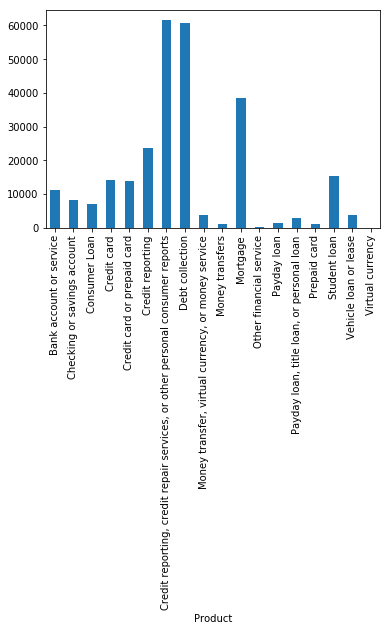

In [48]:
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

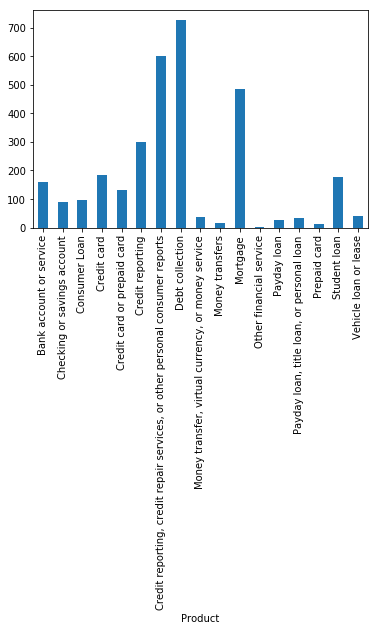

In [71]:
df_train.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [46]:
df.groupby('Product').groups

{'Bank account or service': Int64Index([    124,     136,     153,     298,     365,     376,     420,
                 483,     488,     499,
             ...
             1099004, 1099171, 1099181, 1099298, 1099301, 1099405, 1099416,
             1099439, 1099533, 1099546],
            dtype='int64', length=14887),
 'Checking or savings account': Int64Index([   4098,    5938,   10418,   13012,   18995,   22326,   22327,
               24846,   32764,   37486,
             ...
             1097715, 1097847, 1097892, 1097999, 1098008, 1098014, 1098046,
             1098047, 1098066, 1098085],
            dtype='int64', length=8476),
 'Consumer Loan': Int64Index([      2,     154,     260,     368,     412,     559,     761,
                 827,     863,     874,
             ...
             1099207, 1099214, 1099270, 1099394, 1099398, 1099421, 1099471,
             1099477, 1099493, 1099499],
            dtype='int64', length=9474),
 'Credit card': Int64Index([     36,      43,      

In [16]:
df.count()

Product                         312111
Consumer_complaint_narrative    312111
Category_id                     312111
dtype: int64

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english',min_df=5,encoding='latin-1',norm='l2',sublinear_tf=True)

features = tfidf.fit_transform(df_train.Consumer_complaint_narrative).toarray()

labels = df_train.category_id
features.shape

MemoryError: 

##### As you can see above i am getting the MemoryError: due to the large size fo the dataset. ie. in below cell i am reducing the size of the data set to just 1% . 
This is not the acutal train test split, just a measure to about the memory error due to my system resources constraints

In [17]:
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(df, test_size = .99)

In [18]:
df_train.count()

Product                         3121
Consumer_complaint_narrative    3121
Category_id                     3121
dtype: int64

In [19]:
del(df_test)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(ngram_range=(1,2),stop_words='english',min_df=5,encoding='latin-1',norm='l2',sublinear_tf=True)

features = tfidf.fit_transform(df_train.Consumer_complaint_narrative).toarray()

labels = df_train.Category_id
features.shape

(3121, 9144)

In [21]:
from sklearn.feature_selection import chi2
N = 2
for product, category in category_to_id.items():
    features_chi = chi2(features, labels== category)
    indices = np.argsort(features_chi[0])
    feature_name = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_name if len(v.split())==1]
    bigrams = [v for v in feature_name if len(v.split())==2]
    print("# '{}':".format(product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))    

# 'Credit reporting':
  . Most correlated unigrams:
. experian
. equifax
  . Most correlated bigrams:
. trans union
. equifax remove
# 'Consumer Loan':
  . Most correlated unigrams:
. car
. ally
  . Most correlated bigrams:
. car loan
. auto loan
# 'Debt collection':
  . Most correlated unigrams:
. collection
. debt
  . Most correlated bigrams:
. collection agency
. collect debt
# 'Mortgage':
  . Most correlated unigrams:
. modification
. mortgage
  . Most correlated bigrams:
. escrow account
. loan modification
# 'Credit card':
  . Most correlated unigrams:
. macy
. card
  . Most correlated bigrams:
. american express
. credit card
# 'Other financial service':
  . Most correlated unigrams:
. treasury
. deeper
  . Most correlated bigrams:
. personal account
. try help
# 'Bank account or service':
  . Most correlated unigrams:
. bank
. overdraft
  . Most correlated bigrams:
. checking account
. overdraft fees
# 'Student loan':
  . Most correlated unigrams:
. student
. navient
  . Most c

In [24]:
features_chi

(array([ 0.2342302 ,  0.00741135,  0.00359979, ...,  0.01623593,
         0.01433243,  0.00687017]),
 array([ 0.62840478,  0.9313955 ,  0.95215705, ...,  0.89860776,
         0.90470646,  0.93394182]))

After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [23]:
MultinomialNB?

In [24]:
x_train, x_test,y_train, y_test = train_test_split(df_train.Consumer_complaint_narrative, 
                                                    df_train.Product, test_size=0.1, random_state = 2)
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
tfid_transformer = TfidfTransformer()
x_train_tfidf = tfid_transformer.fit_transform(x_train_counts)
clf = MultinomialNB().fit(x_train_tfidf,y_train)


In [52]:
type(x_train_counts)

scipy.sparse.csr.csr_matrix

In [58]:
count_vect.vocabulary_

{'account': 645,
 'xxxx': 11184,
 'have': 4949,
 'had': 4866,
 'loans': 6111,
 'with': 11081,
 'one': 7049,
 'closed': 2239,
 'out': 7160,
 'very': 10798,
 'early': 3660,
 'due': 3627,
 'to': 10156,
 'problems': 7771,
 'the': 10013,
 'othe': 7145,
 'always': 993,
 'paid': 7254,
 'few': 4273,
 'years': 11269,
 'in': 5321,
 'advance': 788,
 'as': 1254,
 'became': 1562,
 'again': 862,
 'would': 11147,
 'ask': 1263,
 'teller': 9946,
 'reapply': 8084,
 'principal': 7741,
 'unpaid': 10578,
 'balance': 1479,
 'each': 3653,
 'overtime': 7217,
 'ic': 5197,
 'came': 1931,
 'bank': 1493,
 'make': 6236,
 'payment': 7351,
 'on': 7046,
 'several': 9096,
 'occasions': 6975,
 'wait': 10876,
 'for': 4440,
 '10': 13,
 '15': 68,
 'minutes': 6478,
 'whiles': 11016,
 'called': 1918,
 'that': 10004,
 'appropriate': 1170,
 'office': 7015,
 'this': 10068,
 'request': 8499,
 'write': 11162,
 'receipt': 8114,
 'and': 1042,
 'been': 1576,
 'my': 6699,
 'way': 10939,
 'tellers': 9947,
 'were': 10979,
 'also': 980

In [57]:
print(x_train_counts.toarray())

[[2 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [43]:
print(x_train.shape)
print(x_train_tfidf.shape)
print(x_train_counts.shape)
print(y_train.shape)

(2808,)
(2808, 11308)
(2808, 11308)
(2808,)


After fitting the training set, let’s make some predictions.

In [44]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [45]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,Category_id
12,Debt collection,This company refuses to provide me verificatio...,2


In [46]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

[ 'Credit reporting, credit repair services, or other personal consumer reports']


In [47]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,Category_id
61,Credit reporting,I am disputing the inaccurate information the ...,0


## Model Selection

We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.

We will benchmark the following __4 models:__
-   Logistic Regression
-  (Multinomial) Naive Bayes
-  Linear Support Vector Machine
-  Random Forest

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

In [26]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0)   
]
CV = 5
entries_list = []
# cv_df = pd.DataFrame(index=range(CV*len(models)))
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy',cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries_list.append((model_name,fold_idx, accuracy))
cv_df = pd.DataFrame(data= entries_list, columns=['Model', 'Fold_idx','accuracy'])

/home/amit/anaconda3/envs/VenvPandas/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/amit/anaconda3/envs/VenvPandas/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/amit/anaconda3/envs/VenvPandas/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/home/amit/anaconda3/envs/VenvPandas/lib/python3.6/site-packages/sklearn/model_selection/_split.py:5

In [27]:
cv_df

,Model,Fold_idx,accuracy
0,RandomForestClassifier,0,0.374603
1,RandomForestClassifier,1,0.372611
2,RandomForestClassifier,2,0.388179
3,RandomForestClassifier,3,0.397106
4,RandomForestClassifier,4,0.396748
5,LinearSVC,0,0.661905
6,LinearSVC,1,0.670382
7,LinearSVC,2,0.634185
8,LinearSVC,3,0.641479
9,LinearSVC,4,0.666667


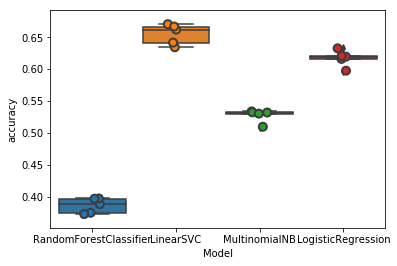

In [34]:
import seaborn as sns
sns.boxplot(x='Model',y='accuracy',data=cv_df)
sns.stripplot(x='Model',y='accuracy',data=cv_df,
             size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [28]:
cv_df.groupby('Model').accuracy.mean()

Model
LinearSVC                 0.654924
LogisticRegression        0.617169
MultinomialNB             0.527431
RandomForestClassifier    0.385850
Name: accuracy, dtype: float64

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 65% with just 1% of the data.

Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

In [35]:
model = LinearSVC()
x_train, x_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, 
                                                                                 df_train.index, test_size=0.33
                                                                                 ,random_state=0)
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)

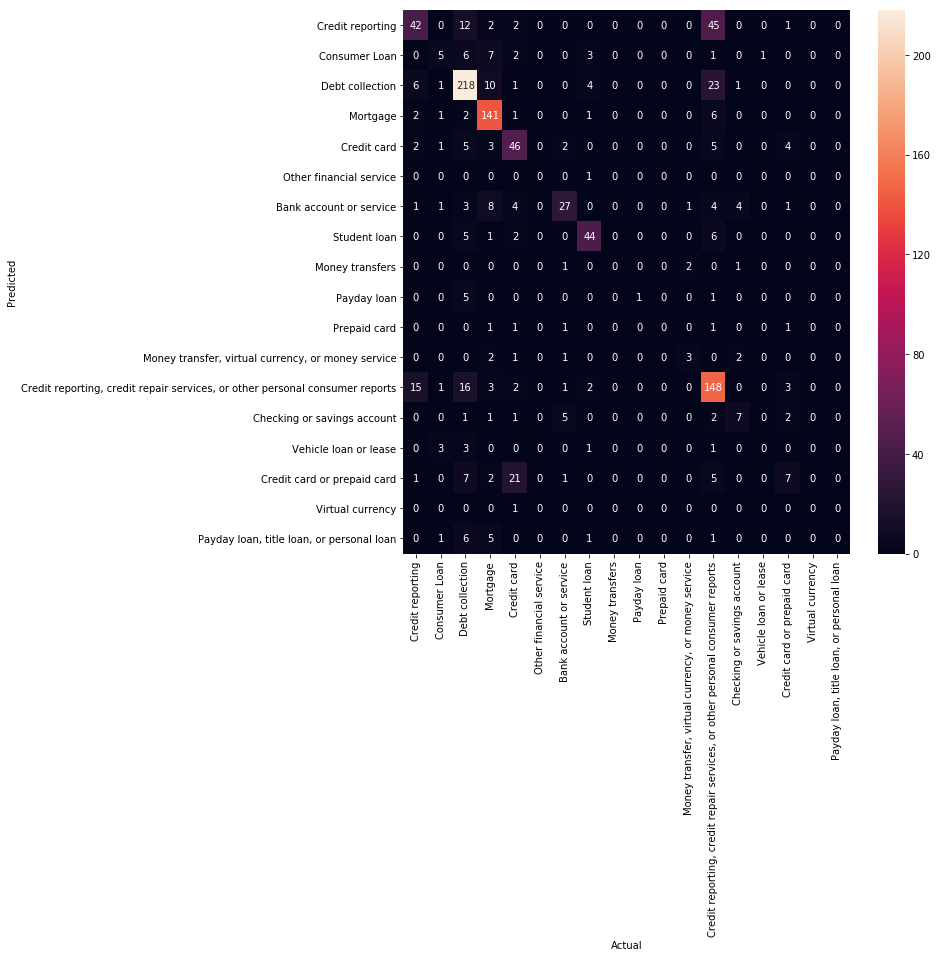

In [43]:
from sklearn.metrics import confusion_matrix
cnf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize= (10,10))
sns.heatmap(cnf_mat , annot= True, fmt='d', xticklabels=category_id_df.Product.values,
           yticklabels=category_id_df.Product.values)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

One common approach for extracting features from the text is to use the bag of words model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

### Summary
-  __categorical__ variables are often better represented by integers than strings.
-  The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length
- One __common approach__ for __extracting features from text is__ to use __bag of words__ model: a model where for each document ,(a complaint narraive in our case) the __presence (and often the frequency) of words is taken into consideration,__  but the __order__, in which the occur __ is ignored__

#### References
 - http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
 - <a href=https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/>__Machine learning Mastery__</a> good for introduction : 5 Min read
 - <a href = http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html/>__Working with text__</a> from sklearn 
      